In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/bmw_preprocessed.csv")
data

,Серия,Поколение,Кузов,Год,Рестайлинг,Пробег,Коробка,Объем,Топливо,Цена
0,1 серия,F40,хэтчбек 5 дв.,2019,0,129000,робот,"1,5 л",дизель,16999
1,7 серия,G12,седан,2019,1,35000,автомат,"3,0 л",дизель,83777
2,5 серия,E39,седан,1999,0,400000,механика,"2,5 л",дизель,3399
3,1 серия,"E81, E82, E88, E87",хэтчбек 5 дв.,2005,0,370000,автомат,"2,0 л",бензин,7200
4,X6,E71,внедорожник 5 дв.,2012,1,149000,автомат,"3,0 л",бензин,23450
...,...,...,...,...,...,...,...,...,...,...
2788,X6,E71,внедорожник 5 дв.,2011,0,277000,автомат,"3,0 л",дизель,22290
2789,5 серия,"F10, F11",седан,2012,0,256000,автомат,"3,0 л",дизель,23500
2790,4 серия,"F32, F33, F36",купе,2013,0,268500,автомат,"2,0 л",бензин,21500
2791,2 серия,F45,минивэн,2017,0,200000,механика,"1,5 л",дизель,13000


In [ ]:
# Убираем все объявления с приколхоженным пропаном-бутаном к машине (27 шт.)
data = data[data['Топливо'] != 'бензин (пропан-бутан)']
data['Топливо'].value_counts()

Топливо
бензин    1450
дизель    1316
Name: count, dtype: int64

In [ ]:
# Убираем автомобиили с кузовом "родстер" (3 шт.)
data = data[data['Кузов'] != 'родстер']
data['Кузов'].value_counts()

Кузов
седан                1161
внедорожник 5 дв.     879
универсал             289
лифтбек               130
минивэн                91
купе                   79
хэтчбек 5 дв.          71
кабриолет              39
хэтчбек 3 дв.          24
Name: count, dtype: int64

In [9]:
# Удаляем строки, где пробег больше 600000
data = data[data['Пробег'] <= 600000]
data['Пробег'].value_counts(bins=10)

(60912.6, 120811.2]              440
(120811.2, 180709.8]             412
(180709.8, 240608.4]             379
(240608.4, 300507.0]             350
(415.01300000000003, 60912.6]    328
(300507.0, 360405.6]             326
(360405.6, 420304.2]             244
(420304.2, 480202.8]             134
(480202.8, 540101.4]             100
(540101.4, 600000.0]              32
Name: count, dtype: int64

In [13]:
# Удаляем автомобили, у которых объем двигателя встречается менее 10 раз
volume_counts = data['Объем'].value_counts()
volumes_to_keep = volume_counts[volume_counts >= 10].index
data = data[data['Объем'].isin(volumes_to_keep)]
data['Объем'].value_counts()

Объем
2,0 л    989
3,0 л    878
2,5 л    243
1,5 л    242
4,4 л     96
2,9 л     70
1,6 л     55
1,8 л     42
2,8 л     26
2,2 л     26
1,9 л     21
4,8 л     20
Name: count, dtype: int64

In [25]:
# Преобразуем объем двигателя в число
def parse_volume_to_float(volume_str):
    # Удаляем неразрывные пробелы и берем только число (заменяем запятую на точку)
    if isinstance(volume_str, str):
        num = re.match(r"([\d,\.]+)", volume_str.replace('\xa0', ''))
        if num:
            return float(num.group(1).replace(',', '.'))
    return None

data['Объем'] = data['Объем'].apply(parse_volume_to_float)
data['Объем'].info()

<class 'pandas.core.series.Series'>
Index: 2708 entries, 0 to 2791
Series name: Объем
Non-Null Count  Dtype  
--------------  -----  
2708 non-null   float64
dtypes: float64(1)
memory usage: 42.3 KB


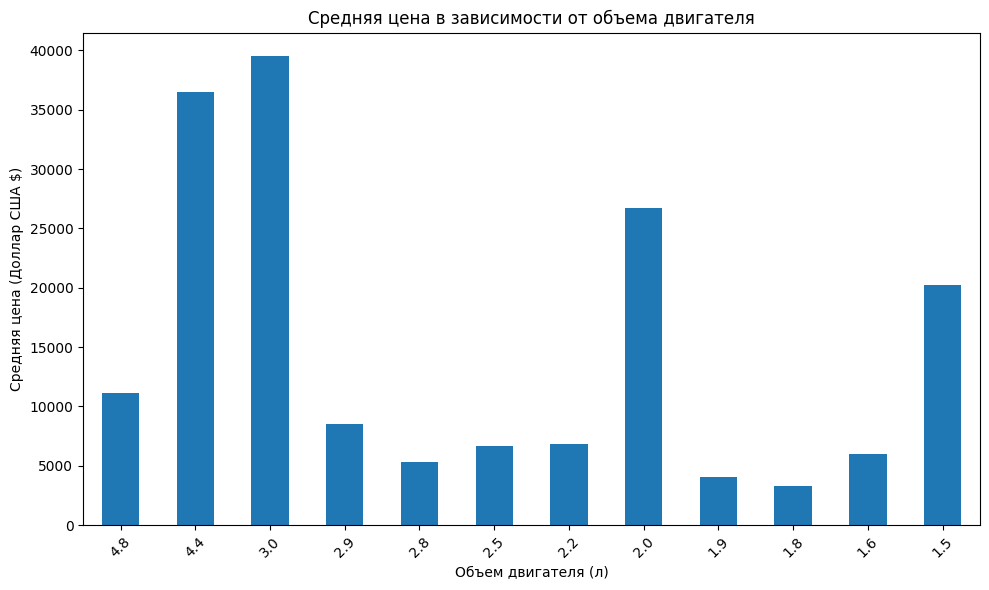

In [27]:
# Группируем и сортируем по среднему значению цены, но индексы (объемы) сортируем по убыванию объема
avg_price_by_volume = (
    data.groupby(['Объем'])['Цена']
    .mean()
    .reset_index()
    .sort_values('Объем', ascending=False)
    .set_index('Объем')
)['Цена']

plt.figure(figsize=(10, 6))
avg_price_by_volume.plot(kind='bar')
plt.xlabel('Объем двигателя (л)')
plt.ylabel('Средняя цена (Доллар США $)')
plt.title('Средняя цена в зависимости от объема двигателя')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()